In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("dataset3-1.csv")

In [ ]:
df.head()

,cow,date,hour,IN_ALLEYS,REST,EAT,ACTIVITY_LEVEL,oestrus,calving,lameness,mastitis,LPS,acidosis,other_disease,accidents,disturbance,mixing,management_changes,OK
0,10127,2013-10-01,1,0.000,3600.000,0.000,-828.00000,0,0,0,0,NaN,NaN,0,0,0,0,0,1
1,10127,2013-10-01,2,2931.783,444.528,223.689,460.79322,0,0,0,0,NaN,NaN,0,0,0,0,0,1
2,10127,2013-10-01,3,257.740,2930.966,411.294,-460.14030,0,0,0,0,NaN,NaN,0,0,0,0,0,1
3,10127,2013-10-01,4,63.220,3536.780,0.000,-803.34420,0,0,0,0,NaN,NaN,0,0,0,0,0,1
4,10127,2013-10-01,5,0.000,3600.000,0.000,-828.00000,0,0,0,0,NaN,NaN,0,0,0,0,0,1


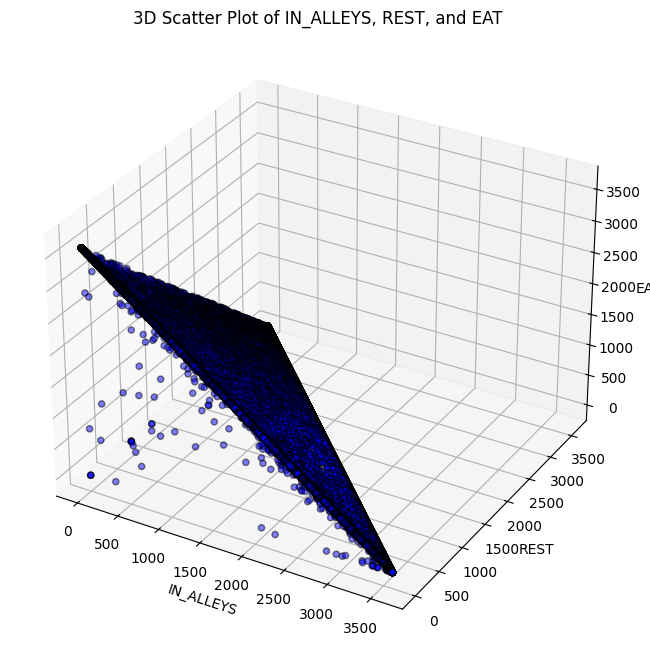

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['IN_ALLEYS'], df['REST'], df['EAT'], c='blue', alpha=0.5, edgecolors='k')

# Labels and title
ax.set_title('3D Scatter Plot of IN_ALLEYS, REST, and EAT')
ax.set_xlabel('IN_ALLEYS')
ax.set_ylabel('REST')
ax.set_zlabel('EAT')

plt.show()

### 1/ Correlation between Features (IN_ALLEYS, REST, EAT)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

           IN_ALLEYS      REST       EAT
IN_ALLEYS   1.000000 -0.767063  0.229712
REST       -0.767063  1.000000 -0.698554
EAT         0.229712 -0.698554  1.000000


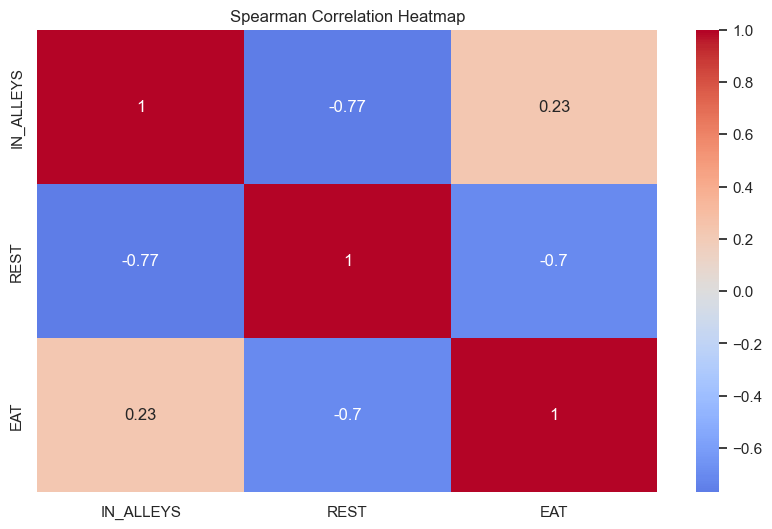

In [ ]:
spearman_corr = df[['IN_ALLEYS', 'REST', 'EAT']].corr(method='spearman')
print(spearman_corr)

# Set the style
sns.set(style="whitegrid")
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap')
plt.show()

### 2/ Correlation between Target Classes

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
target_classes = ['oestrus','calving','lameness','mastitis','other_disease','accidents','disturbance','management_changes','OK']

In [ ]:
# result = []
# for i in range(len(target_classes)-1):

#     contingency_table = pd.crosstab(df[target_classes[i]], df[target_classes[i+1]])

#     chi2, p, dof, expected = chi2_contingency(contingency_table)
#     result.append({"pair":f"{target_classes[i]}_{target_classes[i+1]}","chi2":chi2,"p_value":p})

# print(f"Chi-squared value: {chi2}")
# print(f"P-value: {p}")
# print(result)

In [ ]:
# df_results = pd.DataFrame(result)

# fig, ax1 = plt.subplots(figsize=(10, 6))

# sns.barplot(x="pair", y="chi2", data=df_results, ax=ax1, color="blue", alpha=0.6, label="Chi-squared Value")
# ax1.set_ylabel("Chi-Squared Value", color="blue")
# ax1.set_xlabel("Target Class Pairs")
# ax1.set_xticklabels(df_results["pair"], rotation=45, ha="right")

# ax2 = ax1.twinx()
# sns.lineplot(x="pair", y="p_value", data=df_results, ax=ax2, color="red", marker="o", label="P-value")
# ax2.set_ylabel("P-value", color="red")

# ax2.axhline(0.05, color="black", linestyle="--", linewidth=1, label="Significance Threshold (p=0.05)")

# ax1.legend(loc="upper left")
# ax2.legend(loc="upper right")

# plt.title("Chi-Squared Test Results for Target Class Correlation")

# plt.show()


In [ ]:
from scipy.stats import chi2_contingency

results = []

for i in range(len(target_classes)):
    for j in range(len(target_classes)):
        contingency_table = pd.crosstab(df[target_classes[i]], df[target_classes[j]])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results.append({
            "row": target_classes[i],
            "col": target_classes[j],
            "chi2": chi2,
            "p_value": p
        })

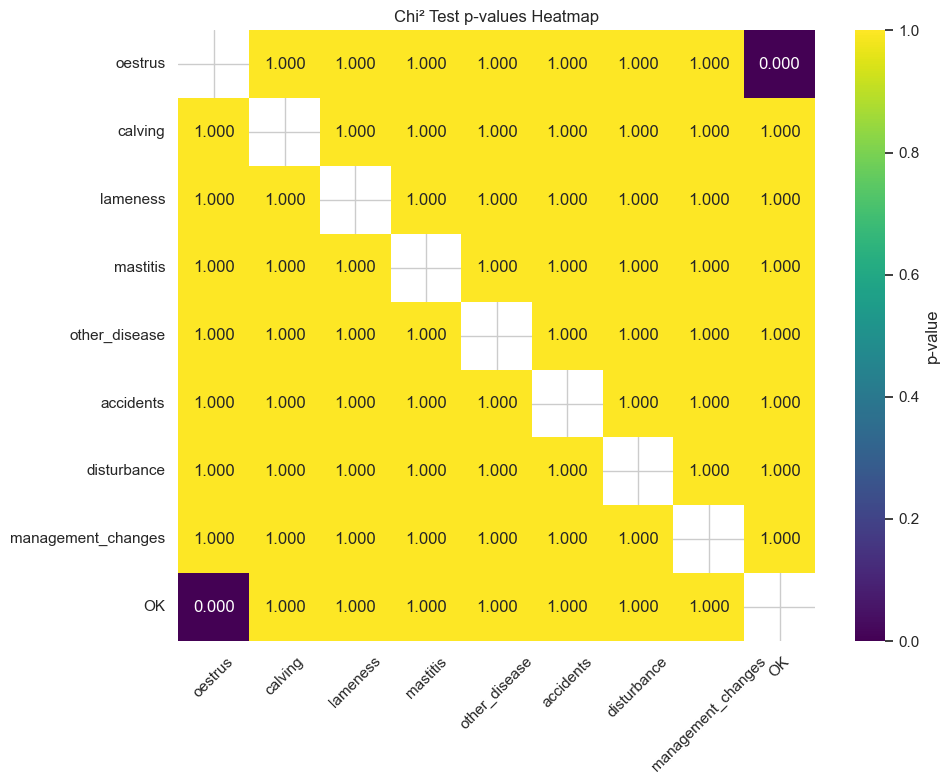

In [ ]:


chi2_matrix = pd.DataFrame(0.0, index=target_classes, columns=target_classes)

for r in results:
    chi2_matrix.loc[r["row"], r["col"]] = r["p_value"]

np.fill_diagonal(chi2_matrix.values, np.nan)

plt.figure(figsize=(10, 8))
sns.heatmap(chi2_matrix, annot=True, cmap="viridis", fmt=".3f", cbar_kws={'label': 'p-value'})
plt.title("Chi² Test p-values Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\ghozz\AppData\Local\Temp\ipykernel_23964\1710743398.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_results["pair"], rotation=45, ha="right")


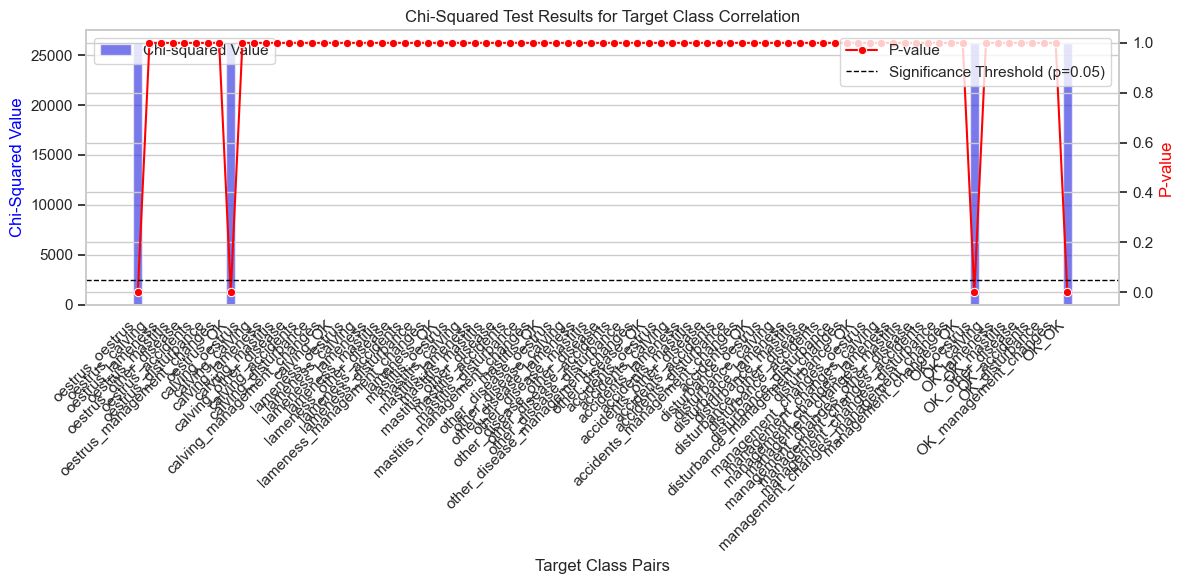

In [ ]:
df_results = pd.DataFrame(results)
df_results["pair"] = df_results["row"] + "_" + df_results["col"]
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x="pair", y="chi2", data=df_results, ax=ax1, color="blue", alpha=0.6, label="Chi-squared Value")
ax1.set_ylabel("Chi-Squared Value", color="blue")
ax1.set_xlabel("Target Class Pairs")
ax1.set_xticklabels(df_results["pair"], rotation=45, ha="right")

ax2 = ax1.twinx()
sns.lineplot(x="pair", y="p_value", data=df_results, ax=ax2, color="red", marker="o", label="P-value")
ax2.set_ylabel("P-value", color="red")

ax2.axhline(0.05, color="black", linestyle="--", linewidth=1, label="Significance Threshold (p=0.05)")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Chi-Squared Test Results for Target Class Correlation")
plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.feature_selection import mutual_info_classif

# X = df[['IN_ALLEYS', 'REST', 'EAT', 'ACTIVITY_LEVEL']]
# y = df['oestrus']

# mi = mutual_info_classif(X, y)
# print(f"Mutual Information: {mi}")


In [ ]:
# from scipy.stats import kruskal

# # Non-parametric version of ANOVA
# kruskal_result = kruskal(df['IN_ALLEYS'][df['oestrus'] == 1], df['IN_ALLEYS'][df['oestrus'] == 0])
# print(f"Kruskal-Wallis H-value: {kruskal_result.statistic}, P-value: {kruskal_result.pvalue}")


# Target Classes VS Features

In [ ]:
df['healthstate'] = df[target_classes].idxmax(axis=1)
print(df[['healthstate'] + target_classes].head())


  healthstate  oestrus  calving  lameness  mastitis  other_disease  accidents  \
0          OK        0        0         0         0              0          0   
1          OK        0        0         0         0              0          0   
2          OK        0        0         0         0              0          0   
3          OK        0        0         0         0              0          0   
4          OK        0        0         0         0              0          0   

   disturbance  management_changes  OK  
0            0                   0   1  
1            0                   0   1  
2            0                   0   1  
3            0                   0   1  
4            0                   0   1  


## Test ANOVA

In [ ]:
from scipy.stats import f_oneway

In [ ]:
features = ['IN_ALLEYS', 'EAT', 'REST']
target = 'healthstate'
classes = df[target].unique()

for feature in features:
    print(f"\n🔬 ANOVA pour {feature}")
    groups = [df[df[target] == c][feature].dropna() for c in classes]
    stat, p = f_oneway(*groups)
    print(f"F = {stat:.4f} | p = {p:.5f}")



🔬 ANOVA pour IN_ALLEYS
F = 0.2519 | p = 0.61574

🔬 ANOVA pour EAT
F = 0.7362 | p = 0.39090

🔬 ANOVA pour REST
F = 1.1142 | p = 0.29119


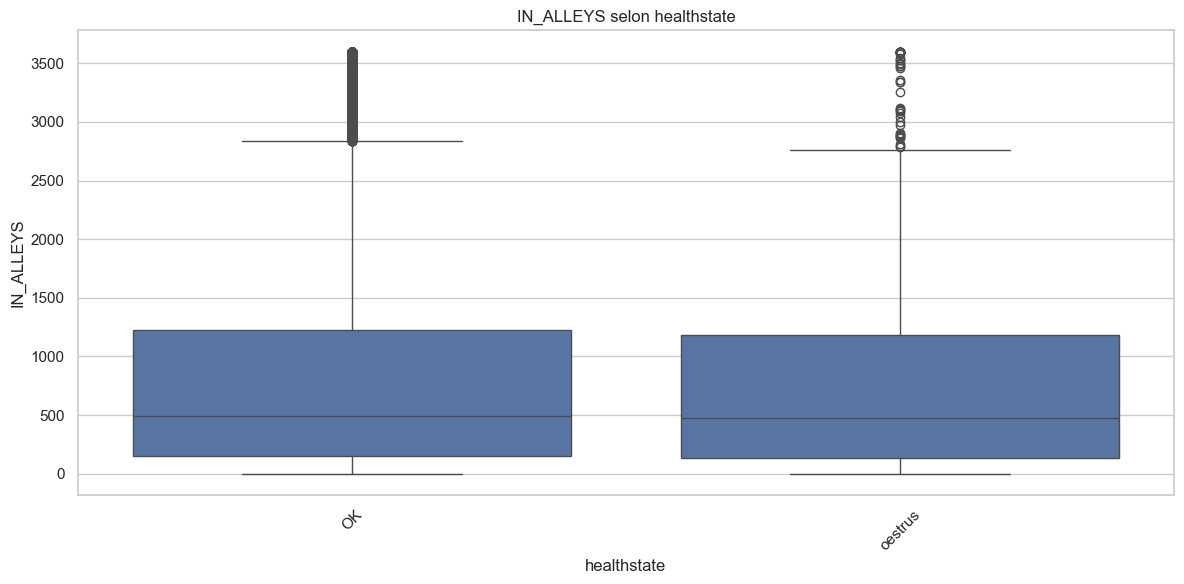

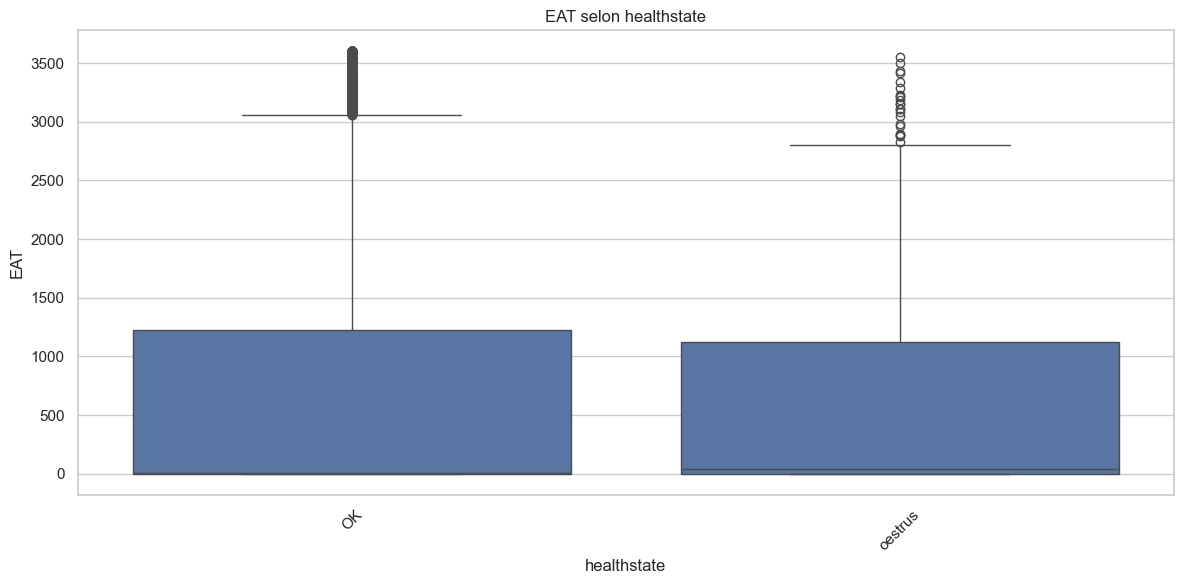

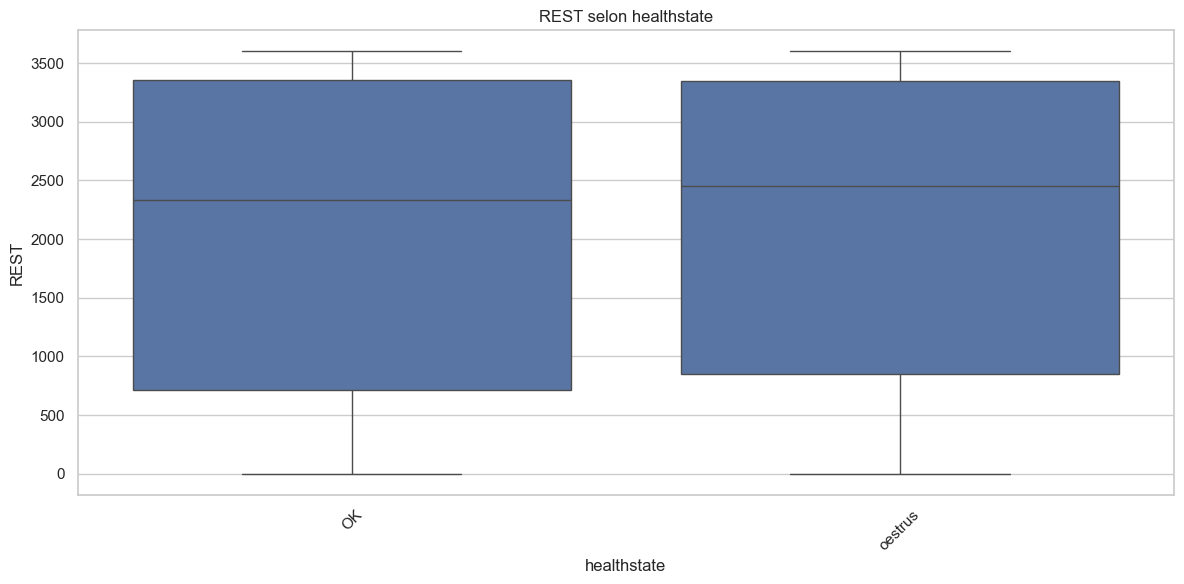

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='healthstate', y=feature, data=df)
    plt.title(f"{feature} selon healthstate")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for feature in features:
    print(f"\n🔬 Test Tukey HSD pour {feature}")

    tukey = pairwise_tukeyhsd(endog=df[feature], groups=df[target], alpha=0.05)

    print(tukey.summary())



🔬 Test Tukey HSD pour IN_ALLEYS
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------
    OK oestrus -19.7542 0.6157 -96.8988 57.3905  False
------------------------------------------------------

🔬 Test Tukey HSD pour EAT
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2 meandiff p-adj    lower    upper  reject
-------------------------------------------------------
    OK oestrus -33.8294 0.3909 -111.1102 43.4513  False
-------------------------------------------------------

🔬 Test Tukey HSD pour REST
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2 meandiff p-adj   lower    upper   reject
-------------------------------------------------------
    OK oestrus  57.0616 0.2912 -48.8976 163.0208  False
-------------------------------------------------------


Les dates que j'ai

In [ ]:
date_range = pd.date_range(start=df["date"].min(), end=df["date"].max(), freq='D')
print(f"Intervalle des dates : {len(date_range)} jours de {date_range[0].date()} à {date_range[-1].date()}")


Intervalle des dates : 42 jours de 2013-10-01 à 2013-11-11


les dates manquantes

In [ ]:
dates_presentes = pd.to_datetime(df["date"]).unique()
dates_manquantes = pd.DatetimeIndex(date_range).difference(dates_presentes)
if len(dates_manquantes) > 0:
    print(f"Jours manquants dans l'intervalle global :{len(dates_manquantes)}\n{dates_manquantes}")
else:
    print("Aucun jour manquant dans l'intervalle global.")

Aucun jour manquant dans l'intervalle global.


Id des vaches

In [ ]:
vaches_ids = df["cow"].unique()
print(f"Liste des IDs des vaches : {vaches_ids}")

Liste des IDs des vaches : [10127 10567  1565  1797  1919  2284  2340  2395  2399  2576  2581  2699
  4102  4262  4279  4372  4495  4716  5098  5104  5128  5394  5541  5810
  5896  8595  9481  9502  9601  9994]


In [ ]:
hourly_counts = df.groupby(['cow', 'date']).size().reset_index(name='hourly_records')
print(hourly_counts)

        cow        date  hourly_records
0      1565  2013-10-01              24
1      1565  2013-10-02              24
2      1565  2013-10-03              24
3      1565  2013-10-04              24
4      1565  2013-10-05              24
...     ...         ...             ...
1091  10567  2013-10-27              24
1092  10567  2013-10-28              24
1093  10567  2013-10-29              24
1094  10567  2013-10-30              24
1095  10567  2013-10-31              13

[1096 rows x 3 columns]


In [ ]:
days_with_24_entries = hourly_counts[hourly_counts['hourly_records'] == 24]

print(f"Days with 24 entries per cow:\n{days_with_24_entries}")


Days with 24 entries per cow:
        cow        date  hourly_records
0      1565  2013-10-01              24
1      1565  2013-10-02              24
2      1565  2013-10-03              24
3      1565  2013-10-04              24
4      1565  2013-10-05              24
...     ...         ...             ...
1090  10567  2013-10-26              24
1091  10567  2013-10-27              24
1092  10567  2013-10-28              24
1093  10567  2013-10-29              24
1094  10567  2013-10-30              24

[1078 rows x 3 columns]


In [ ]:
days_with_less_24_entries = hourly_counts[hourly_counts['hourly_records'] < 24]

print(f"Days with 24 entries per cow:\n{days_with_less_24_entries}")


Days with 24 entries per cow:
        cow        date  hourly_records
21     1565  2013-10-22              13
69     1919  2013-10-07              23
90     1919  2013-10-28              22
344    4102  2013-10-07              23
365    4102  2013-10-28              22
386    4262  2013-10-07              23
407    4262  2013-10-28              22
449    4279  2013-10-28              22
470    4372  2013-10-07              23
489    4372  2013-10-28              22
615    5098  2013-10-28              22
656    5104  2013-10-28              22
677    5128  2013-10-07              23
698    5128  2013-10-28              22
740    5394  2013-10-28              22
746    5394  2013-11-03              12
843    5896  2013-10-13               2
1095  10567  2013-10-31              13


In [ ]:
# Ensure 'date_only' column exists by extracting the date part from 'date'
df['date_only'] = pd.to_datetime(df['date']).dt.date

# Create a new DataFrame that only includes the days with 24 observations per cow
df_days = df.groupby(['cow', 'date_only']).size().reset_index(name='entries')

# Filter to keep only those days where there are 24 observations
df_days = df_days[df_days['entries'] == 24]


# Group by 'cow' and 'date_only', then count the days with 24 observations
cow_day_distribution = df_days.groupby('cow')['date_only'].count().reset_index()

# Rename the column to make it clear
cow_day_distribution.columns = ['cow', 'days_with_24_entries']

# Sort by the number of days with 24 entries
cow_day_distribution = cow_day_distribution.sort_values(by='days_with_24_entries', ascending=False)

# Display the result
print(cow_day_distribution.head())


     cow  days_with_24_entries
15  4716                    42
9   2699                    42
25  9502                    42
21  5810                    42
20  5541                    42


In [ ]:
print(f"Number of unique cows in the dataset: {df['cow'].nunique()}")


Number of unique cows in the dataset: 30


In [ ]:
# Group by cow and date, count the number of entries per day
cow_day_count = df.groupby(['cow', 'date_only']).size().reset_index(name='entries')

# Check how many days each cow has with 24 entries
cows_with_24_entries = cow_day_count[cow_day_count['entries'] == 24]

print(f"Number of unique cows with 24 entries per day: {cows_with_24_entries['cow'].nunique()}")


Number of unique cows with 24 entries per day: 30


In [ ]:
missing_data = df.isnull().sum()
print(f"Missing data per column: \n{missing_data}")

Missing data per column: 
cow                       0
date                      0
hour                      0
IN_ALLEYS                 0
REST                      0
EAT                       0
ACTIVITY_LEVEL            0
oestrus                   0
calving                   0
lameness                  0
mastitis                  0
LPS                   26225
acidosis              26225
other_disease             0
accidents                 0
disturbance               0
mixing                    0
management_changes        0
OK                        0
healthstate               0
date_only                 0
dtype: int64


In [ ]:
cow_day_distribution = cows_with_24_entries.groupby('cow')['date_only'].count().reset_index()

# Rename the column
cow_day_distribution.columns = ['cow', 'days_with_24_entries']

# Show the distribution of days with 24 entries per cow
print(cow_day_distribution)




      cow  days_with_24_entries
0    1565                    21
1    1797                    41
2    1919                    40
3    2284                    10
4    2340                    42
5    2395                    42
6    2399                    15
7    2576                    42
8    2581                    40
9    2699                    42
10   4102                    40
11   4262                    40
12   4279                    41
13   4372                    38
14   4495                    42
15   4716                    42
16   5098                    40
17   5104                    41
18   5128                    40
19   5394                    32
20   5541                    42
21   5810                    42
22   5896                    12
23   8595                    42
24   9481                    42
25   9502                    42
26   9601                    42
27   9994                    15
28  10127                    40
29  10567                    28


In [ ]:
total_days_per_cow = df.groupby('cow')['date_only'].nunique().reset_index()
total_days_per_cow.columns = ['cow', 'total_days']

cow_day_count = df.groupby(['cow', 'date_only']).size().reset_index(name='entries')
cows_with_24_entries = cow_day_count[cow_day_count['entries'] == 24]

days_with_24_entries = cows_with_24_entries.groupby('cow')['date_only'].count().reset_index()
days_with_24_entries.columns = ['cow', 'days_with_24_entries']

cow_day_distribution = pd.merge(total_days_per_cow, days_with_24_entries, on='cow', how='left')

cow_day_distribution['days_with_24_entries'] = cow_day_distribution['days_with_24_entries'].fillna(0)

check = False
for _, row in cow_day_distribution.iterrows():
    if row['total_days'] != row['days_with_24_entries']:
        check = True
        print(f"Alert: Cow {row['cow']} has {row['total_days']} total days, but only {row['days_with_24_entries']} days with 24 entries.")

print(cow_day_distribution)

if not check:
    print("All cows have the same total days and days with 24 entries.")


Alert: Cow 1565 has 22 total days, but only 21 days with 24 entries.
Alert: Cow 1919 has 42 total days, but only 40 days with 24 entries.
Alert: Cow 4102 has 42 total days, but only 40 days with 24 entries.
Alert: Cow 4262 has 42 total days, but only 40 days with 24 entries.
Alert: Cow 4279 has 42 total days, but only 41 days with 24 entries.
Alert: Cow 4372 has 40 total days, but only 38 days with 24 entries.
Alert: Cow 5098 has 41 total days, but only 40 days with 24 entries.
Alert: Cow 5104 has 42 total days, but only 41 days with 24 entries.
Alert: Cow 5128 has 42 total days, but only 40 days with 24 entries.
Alert: Cow 5394 has 34 total days, but only 32 days with 24 entries.
Alert: Cow 5896 has 13 total days, but only 12 days with 24 entries.
Alert: Cow 10567 has 29 total days, but only 28 days with 24 entries.
      cow  total_days  days_with_24_entries
0    1565          22                    21
1    1797          41                    41
2    1919          42                  

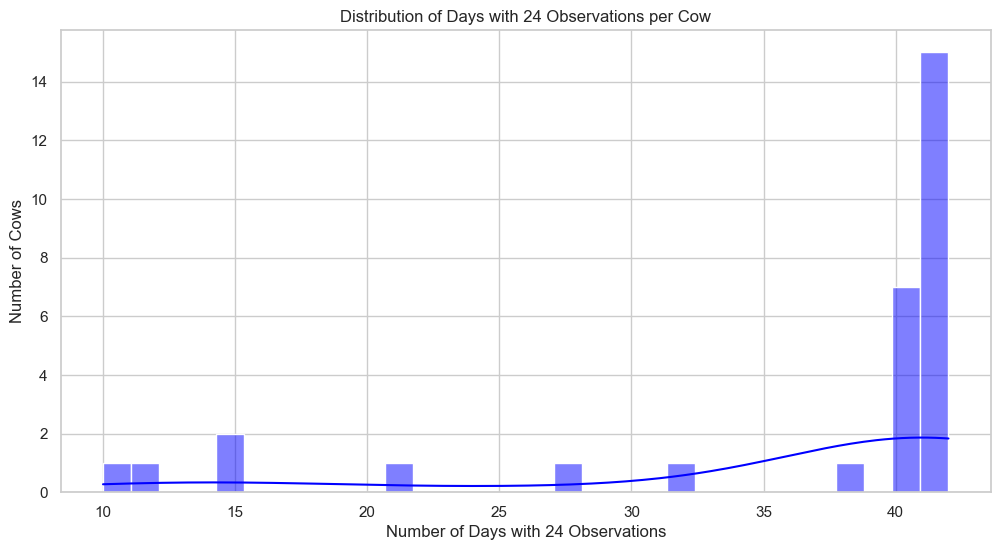

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(cow_day_distribution['days_with_24_entries'], kde=True, bins=30, color='blue')
plt.title("Distribution of Days with 24 Observations per Cow")
plt.xlabel("Number of Days with 24 Observations")
plt.ylabel("Number of Cows")
plt.show()

In [ ]:
# vaches_manquantes = []

# # Vérifier les jours manquants pour chaque vache
# for vache_id in vaches_ids:
#     # Récupérer les dates pour cette vache
#     vache_dates = df[df["cow"] == vache_id]["date"].sort_values().reset_index(drop=True)

#     # Créer une série de dates attendues
#     all_dates = pd.date_range(start=date_range[0], end=date_range[1], freq='D')

#     # Identifier les dates manquantes
#     missing_dates = all_dates.difference(vache_dates)
#     if len(missing_dates) > 0:
#         vaches_manquantes.append({"cow_id": vache_id, "missing_dates": missing_dates})

# if len(vaches_manquantes) > 0:
#     print("Jours manquants pour certaines vaches :")
#     for item in vaches_manquantes:
#         print(f"Vache {item['cow_id']} : {item['missing_dates']}")
# else:
#     print("Aucune date manquante pour les vaches.")

les heures creuse pas date par vache

In [ ]:
heures_creuses = []

for vache_id in vaches_ids:
    vache_data = df[df["cow"] == vache_id]
    for date in pd.to_datetime(vache_data["date"]).unique():
        # Sélectionner les données de cette vache pour cette date
        daily_data = vache_data[vache_data["date"] == date]

        # Calcul des heures creuses
        in_allays_zero = len(daily_data[daily_data["IN_ALLEYS"] == 0])
        eat_zero = len(daily_data[daily_data["EAT"] == 0])
        rest_zero = len(daily_data[daily_data["REST"] == 0])

        # Si un des niveaux d'activité est proche de 0, on considère que c'est une heure creuse
        if in_allays_zero > 0 or eat_zero > 0 or rest_zero > 0:
            heures_creuses.append({"cow": vache_id, "date": date, "in_allays_zero": in_allays_zero,
                                   "eat_zero": eat_zero, "rest_zero": rest_zero})

# Affichage des heures creuses par vache et date
if len(heures_creuses) > 0:
    print("\nHeures creuses par date pour chaque vache :")
    for item in heures_creuses:
        print(f"Vache {item['cow']} - Date {item['date']}: IN_ALLEYS=0 -> {item['in_allays_zero']} | "
              f"EAT=0 -> {item['eat_zero']} | REST=0 -> {item['rest_zero']}")
else:
    print("Aucune heure creuse détectée.")

Aucune heure creuse détectée.
